# Our objective is to study and analyse the data to classify weather a person survived after the surgery or he/she doesn't survive after studying different faetures.Our objective here is to analyse how features like age and the number of axillary nodes affect the survival of a patient.

In [6]:
# Importing libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import 

In [7]:
#Reading data
data = pd.read_csv("haberman.csv", names=['Age', 'Year', 'Axillary nodes dect', 'Survstatus'])
data

,Age,Year,Axillary nodes dect,Survstatus
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


# High level statistics of the dataset:


In [10]:
#No of Datapoints
print(data.shape) # output indicates (rows, columns)

(306, 4)


In [11]:
#number of features
print(data.columns)

Index(['Age', 'Year', 'Axillary nodes dect', 'Survstatus'], dtype='object')


In [12]:
# no of classes in Survstatus
# We have two classes in Survstatus:
# person who is survived after the surgery indicated by 1
# person is dead after the surgery indicated by 2
data['Survstatus'].value_counts()
# datapoints per classes

1    225
2     81
Name: Survstatus, dtype: int64

In [16]:
survived = data[data["Survstatus"] == 1]
dead = data[data["Survstatus"] == 2]

print(survived["Age"].describe())
#Observations 
#Number of people that survived the disease is 225.
#average age of people that survived the test : 52.
#minimum age of people that survived the test : 30.
#maximum age of people that survived the test : 77.



count    225.000000
mean      52.017778
std       11.012154
min       30.000000
25%       43.000000
50%       52.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64


In [18]:
print(dead["Age"].describe())
#Observations :
#Number of people that did not survive the disease is 81.
#average age of people that did not survive the test : 53.
#minimum age of people that did not survive the test : 34.
#maximum age of people that did not survive the test : 83.



count    81.000000
mean     53.679012
std      10.167137
min      34.000000
25%      46.000000
50%      53.000000
75%      61.000000
max      83.000000
Name: Age, dtype: float64


# Perform Bi-variate analysis (scatter plots, pair-plots)

C:\Users\India\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


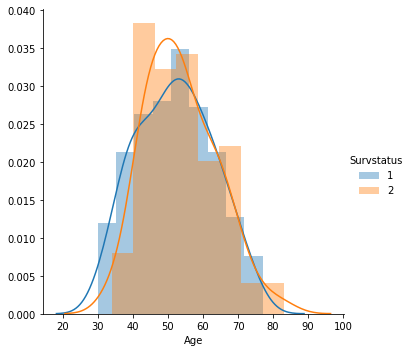

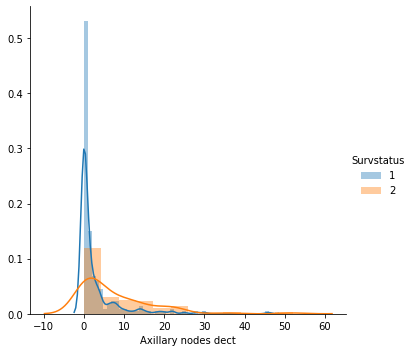

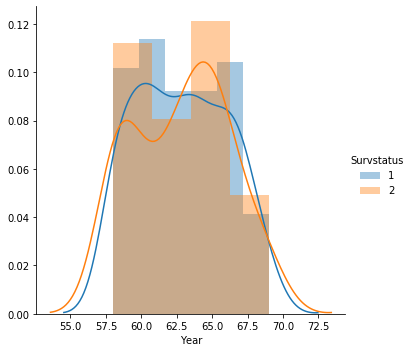

In [34]:
# 1D scatter
# plotting one dimensionally for age 
sns.FacetGrid(data,hue='Survstatus', height=5) \
    .map(sns.distplot, 'Age') \
    .add_legend()
# plotting one dimensionally for axillary nodes 
sns.FacetGrid(data, hue='Survstatus', size=5) \
    .map(sns.distplot, 'Axillary nodes dect') \
    .add_legend()
# plotting one dimensionally for year
sns.FacetGrid(data, hue='Survstatus', height=5) \
    .map(sns.distplot, 'Year') \
    .add_legend()

#From the figure axillary nodes dect is clear for us, so we can say that probability distribution function(PDF) of 1 is high when compared to 2
#If 'Axillary nodes dect' <= 3 then the person is survived else demised.





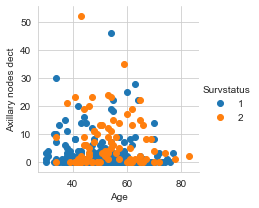

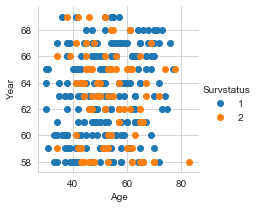

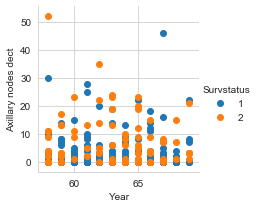

In [40]:
#2D scatter
# For Age and Axillary nodes dect
sns.set_style('whitegrid')
sns.FacetGrid(data, hue='Survstatus', height=3) \
    .map(plt.scatter, 'Age', 'Axillary nodes dect') \
    .add_legend()
plt.show()
#observation
#Here 1 and 2 overlapped using Age and Axillary nodes dect features so the classifiaction between both is not possible.

# For Age and Year

sns.set_style('whitegrid')
sns.FacetGrid(data, hue="Survstatus", height=3) \
    .map(plt.scatter, 'Age', 'Year') \
    .add_legend()
plt.show()

#observaation Here also same overlapping problem like previous one here is also no classification possible.


# For Year and Axillary nodes dect
sns.set_style('whitegrid')
sns.FacetGrid(data, hue='Survstatus', height=3) \
    .map(plt.scatter, 'Year', 'Axillary nodes dect') \
    .add_legend()
plt.show()

#observation Here also same overlapping problem like previous two here is also no classification possible.


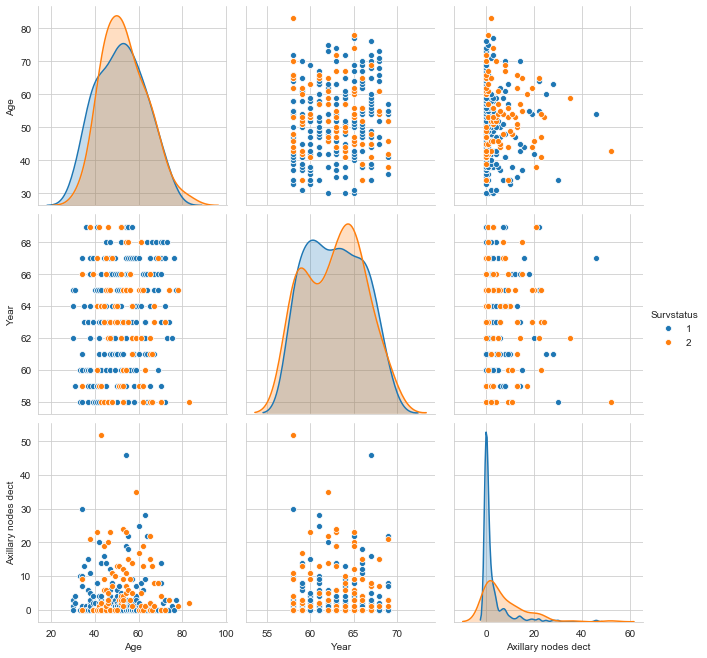

In [41]:
#Pairplots
#Here we get 3c2 = 3 because 3 for features and out of which we select only 2. Therefore the answer is 3.
#In the pairplots we not take the principle diagonal graphs but upper diagonal graphs are same as lower diagonal only the change is in the axis.

sns.set_style('whitegrid')
sns.pairplot(data, hue='Survstatus', vars=['Age', 'Year', 'Axillary nodes dect'], height=3)
plt.show()



In [42]:
#From above we choose one feature that is Auxillary nodes dect.

# Perform Univariate analysis(PDF, CDF, Boxplot, Violin plots)

# From above we choose one feature that is Auxillary nodes dect.

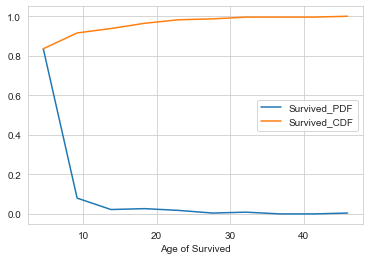

In [43]:
## Analysing more on yearly basis using histogram, PDF and CDF
df_sur = data.loc[data["Survstatus"]==1]
counts, bin_edges = np.histogram(df_sur['Axillary nodes dect'], bins=10, density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend('survivalstatus')
plt.legend(['Survived_PDF', 'Survived_CDF'])
plt.xlabel("Age of Survived")
plt.show()

#Observation:
#From the above graph we can say that 100% of the 1 had less than 40 axillary nodes dect and 4% have less than 10 auxillary nodes dect.



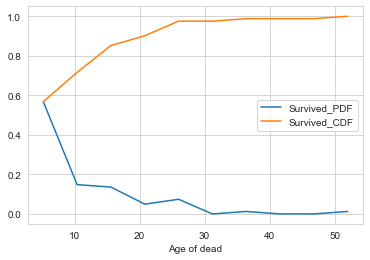

In [45]:
df_dead = data.loc[data['Survstatus']==2]
counts, bin_edges = np.histogram(df_dead['Axillary nodes dect'], bins=10, density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend('survivalstatus')
plt.legend(['Survived_PDF', 'Survived_CDF'])
plt.xlabel("Age of dead")
plt.show()



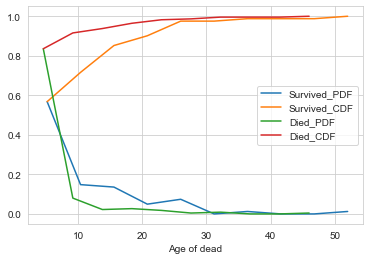

In [46]:
counts, bin_edges = np.histogram(df_dead['Axillary nodes dect'], bins=10, density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(df_sur['Axillary nodes dect'], bins=10, density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend('survstatus')
plt.legend(['Survived_PDF', 'Survived_CDF','Died_PDF', 'Died_CDF'])
plt.xlabel("Age of dead")
plt.show()

#Observation:
#The probablity distribution function(PDF) for the people who survived and those who died different in case of axillary nodes.Hence, axillary nodes is the most important feature to predict the survival status after 5 years.
#The survival rate is extremely high for patients having less than 3 axillary nodes dect.



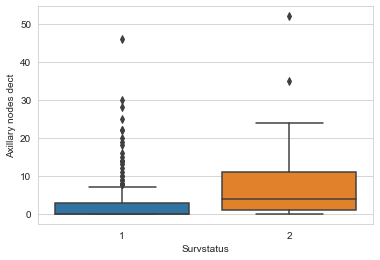

In [50]:
#Boxplot plots
sns.boxplot(x='Survstatus', y='Axillary nodes dect', data=data)
plt.show()


#Boxplot of 1 had only 75th percentile value at axillary nodes dect is 2 and the 25th and 50th percentiles are overlapped.
#Boxplot of 2 had only 25th percentile value at axillary nodes dect is 1, 
#50th percentile value at axillary nodes dectis 3 and 75th percentile value at axillary nodes dect is 11.



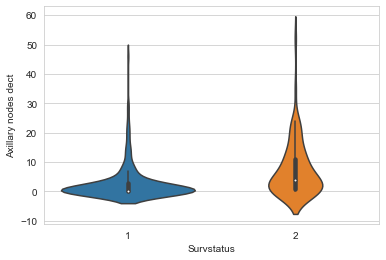

In [52]:
#Violin plot
#It is a graph in which the histogram and boxplot are represent.

sns.violinplot(x='Survstatus', y='Axillary nodes dect', data=data, size=5)
plt.show()


#Observation
#50th percentile of survivors have 0 positive nodes, 75th percentie of survivors have less than 3 positive axilary nodes
#25th percentile of dead have 1 positive axilary node, 50th percentile of dead have positive axilary nodes below 4,
#75th percentile of dead have positive nodes below 11



# Conclusion

In [59]:
#By plotting all pdf, cdf, box-plot, pair plots, scatter plot etc. we get only one conclusion :
#1) If number of axillary node is less,than survival of patients is more
#2) We need more features to comes on very good conlusion.



# Building model for predicting values using features.

In [57]:
# feature matrix: x
x = data.iloc[:,:-1].values 
# label matrix: y
y = data.iloc[:,-1].values
from sklearn.model_selection import train_test_split
#random splitting of dataset into two dataset: training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size  = 0.20, random_state =0)
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

naive_classifier_model = GaussianNB()
naive_classifier_model.fit(x_train, y_train)
train_predict = naive_classifier_model.predict(x_train);
#getting accuracy for training dataset
print("Accuracy_train = ", accuracy_score(y_train, train_predict))
train_accuracy_value = accuracy_score(y_train, train_predict)

#Getting the accuracy value for testing dataset
test_predict = naive_classifier_model.predict(x_test)
print("Accuracy_test = ",accuracy_score(y_test, test_predict))
test_accuracy_value = accuracy_score(y_test, test_predict)

accuracy1 = test_accuracy_value

Accuracy_train =  1.0
Accuracy_test =  1.0


In [58]:
from sklearn import svm

svm_classifier_model = svm.SVC(kernel = 'linear')
svm_classifier_model.fit(x_train,y_train)

train_predict_mat = svm_classifier_model.predict(x_train)

#getting accuracy for training dataset
print("Accuracy_train = ", accuracy_score(y_train, train_predict_mat))
train_accuracy_val = accuracy_score(y_train, train_predict)

#Getting accuracy value for testing dataset
test_predict = svm_classifier_model.predict(x_test)
print("Accuracy_test = ",accuracy_score(y_test, test_predict))
test_accuracy_val = accuracy_score(y_test, test_predict)

accuracy2 = test_accuracy_val

Accuracy_train =  1.0
Accuracy_test =  1.0
